In [22]:
from IPython.display import HTML
from ipywidgets import interact
%matplotlib inline

In [23]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Le code de ce notebook est caché pour faciliter la lecture. 
Pour afficher le code, cliquez <a href="javascript:code_toggle()">ici</a>.''')

# Suites de fonctions: Exemples et contre-exemples

## Les normes $L^p$ sur $C^0([0,1])$ ne sont pas équivalentes

Si elles l'étaient, toute suite de $C^0([0,1])$ convergente pour la norme

$$\|f\|_p = \left( \int_0^1 |f(t)|^p dt \right)^{\frac 1p}$$

serait aussi convergente pour tout autre norme $\|f\|_q$. Mais ce n'est pas le cas. Prenons un paramètre $a > 0$ et définissons la suite de fonctions

$$f_{n}^{a}(x) = 
\begin{cases}
n^a (1-nx) \text{ si } x \in [0, \frac 1n] \\
0 \text{ si } x \in [\frac 1n, 1]
\end{cases}
$$

Ci-dessous le graphe de $f_{n}^{a}$ pour différentes valeurs de $n$ et $a$, et la norme $\|f_{n}^a\|_p$:


interactive(children=(FloatSlider(value=0.0, description='a', max=1.0), IntSlider(value=50, description='n', m…

<function __main__.update_plot(a, n, p)>

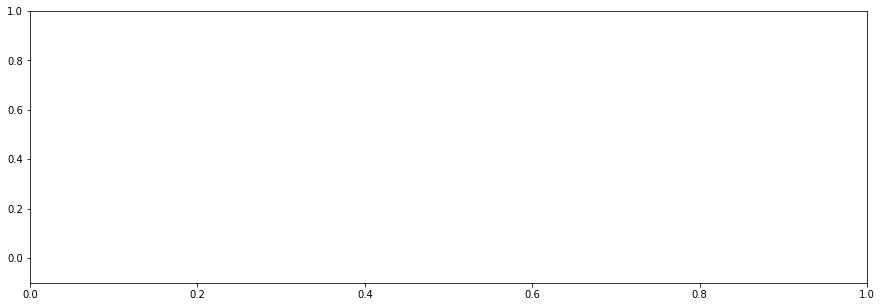

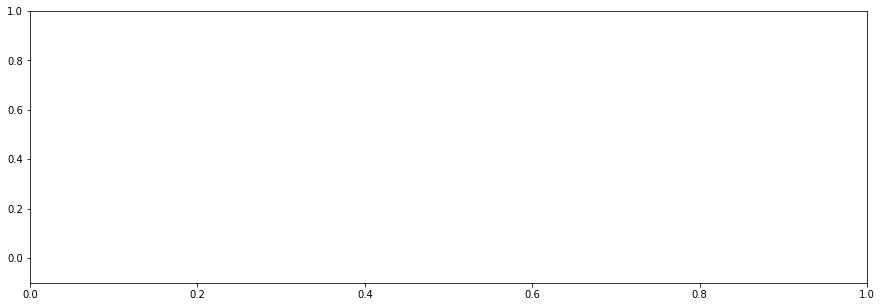

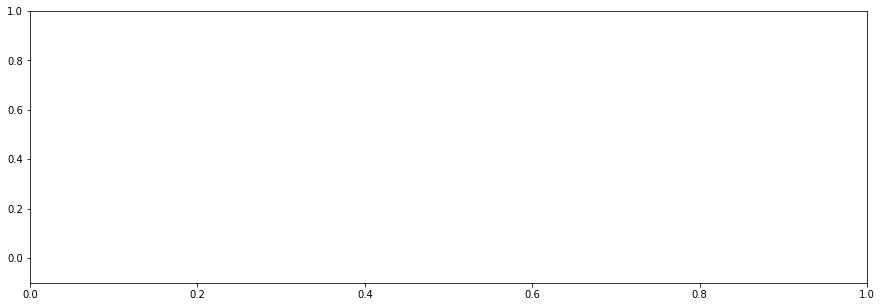

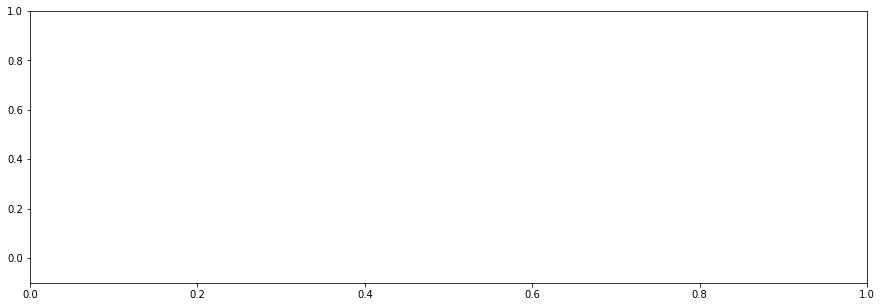

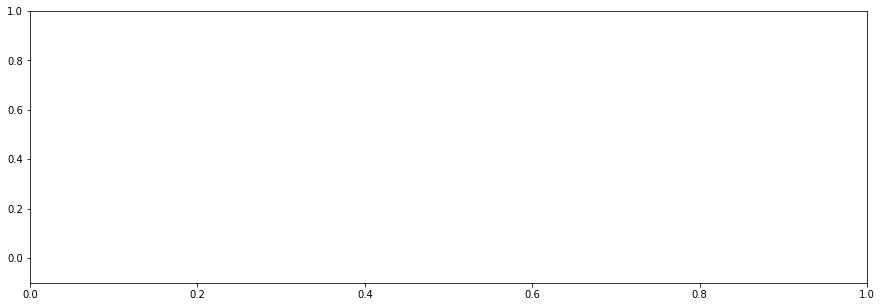

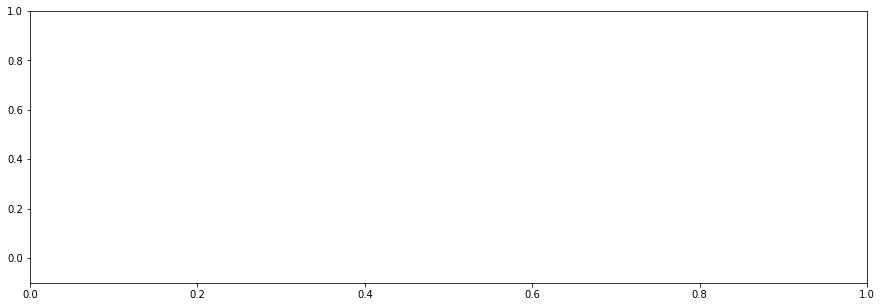

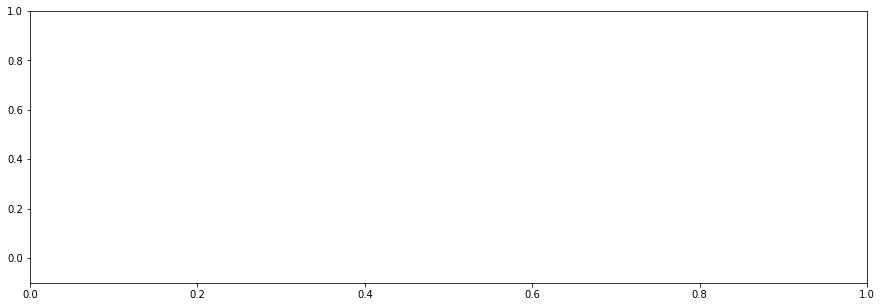

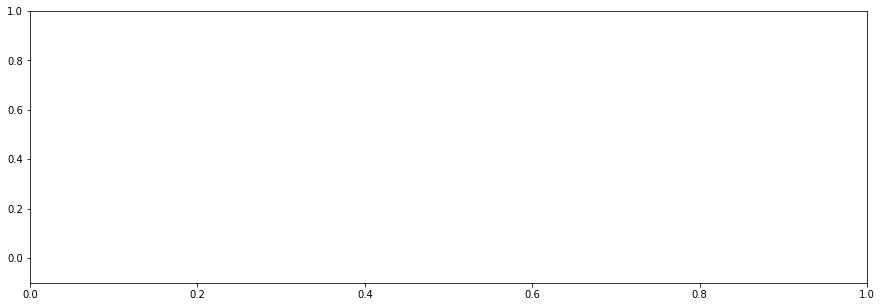

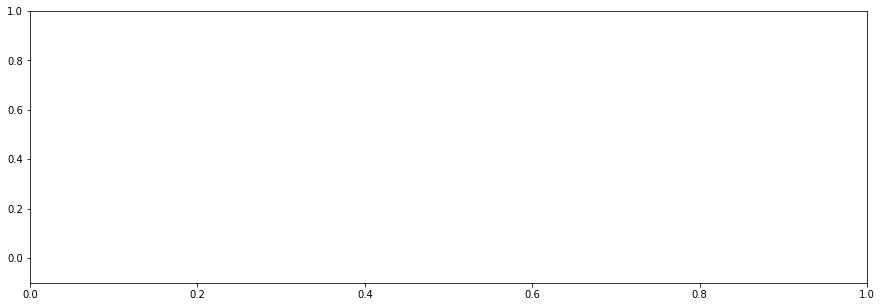

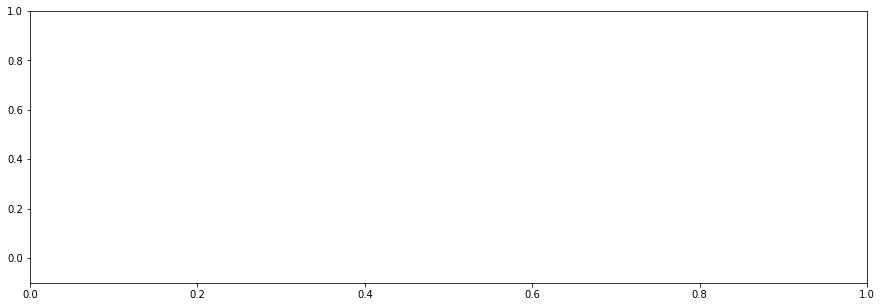

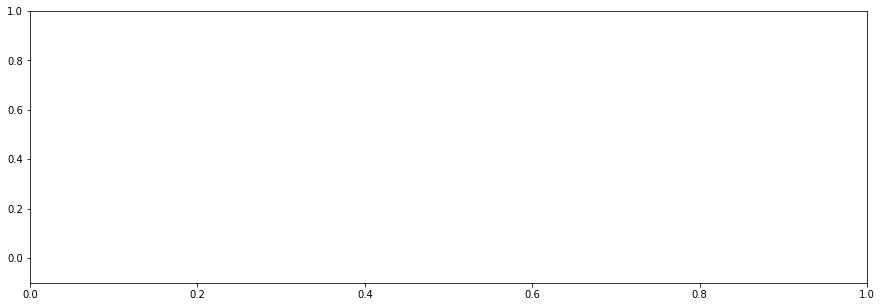

In [24]:
from IPython.display import HTML
from ipywidgets import interact
%matplotlib inline

import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from math import pi

from math import pi

def f1(x,a,n):
    x = np.atleast_1d(x)
    f = np.zeros(len(x))
    for i, x_i in enumerate(x):
        if x_i<1/n:
            f[i] = (n**a)*(1-n*x_i)
        else:
            f[i] = 0
    return f



def update_plot(a,n,p):
    X = np.linspace(0,1,500)
    norme=n**(a*p-1)/(p+1)
    fig, ax= plt.subplots(figsize=(15, 5))
    ax.set_ylim([-0.1, n**a])
    ax.set_xlim([0, 1])
    plt.plot(X,f1(X, a,n),'b')
    plt.title(r'Graphe et norme $L^p$ de $f_n^a$: $||f_n^a||_p$={}'.format(norme ))
    plt.show()


interact ( update_plot, n=(1,100,1), a=(0,1,0.1), p=(1,20,0.5) )





On montre, par un calcul rapide, que dans le cas général,

$$
\|f_{n}^a\|_p = \frac{n^{ap-1}}{p+1}
$$

et tend vers 0 quand $n\rightarrow \infty$ si, et seulement si, $a < \frac 1p$. 

Donc, si $p\neq q$, mettons $p>q$, alors $\frac 1p < \frac 1q$ et, pour tout $a \in ] \frac 1p, \frac 1q[$, la suite $(f_{n}^a)_n$ de $C^0([0,1])$ converge pour $\|.\|_q$, mais pas pour $\|.\|_p$. Ces deux normes ne sont donc pas équivalentes.

## Comparaison des normes $\|.\|_\infty$ et $\|.\|_1$ sur $C^0([-1,1])$

On peut se demander si les normes
$$
\|f\|_\infty= \max_{[-1,1]} |f(x)|
$$
et la norme 
$$
\|f\|_1 = \inf_{-1}^1 |f(t)|dt
$$ 
sont équivalentes sur $C^0([-1,1])$.

On montre par le calcul que, pour toute $f\in C^0([-1,1])$, 
$$\|f\|_1 \leq 2 \|f\|_\infty$$

En revanche, quel que soit $c>0$, on n'a pas
$$ \|f\|_\infty \leq c \|f\|_1$$
pour tout $f\in C^0([-1,1])$. 

En effet, on peut considérer des fonctions "pointues", dont l'intégrale est bornée, mais dont le max est très grand: par exemple

$$f_{n}(x) = 
\begin{cases}
n(1+nx) \text{ si } x \in [-\frac 1n, 0] \\
n (1-nx) \text{ si } x \in [0, \frac 1n] \\
0 \text{ si } x \geq \frac 1n \text{ ou } x \leq -\frac 1n
\end{cases}
$$


In [25]:
from IPython.display import HTML
from ipywidgets import interact
%matplotlib inline

import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from math import pi

from math import pi

def f2(x,n):
    x = np.atleast_1d(x)
    f = np.zeros(len(x))
    for i, x_i in enumerate(x):
        if x_i<-1/n:
            f[i] = 0
        elif -1/n < x_i <=0:
            f[i]=n*(1+n*x_i)
        elif 0 < x_i <=1/n:
            f[i]=n*(1-n*x_i)
        else:
            f[i] = 0
    return f



def update_plot(n):
    X = np.linspace(-1,1,500)
    fig, ax= plt.subplots(figsize=(15, 5))
    ax.set_ylim([-0.1, 51])
    ax.set_xlim([-1.1, 1.1])
    plt.plot(X,f2(X,n),'b')
     
    ax.fill_between(X, 0, f2(X,n))
    plt.title(r'Graphe de $f_n$; normes $||f_n||_1 = 1$, $||f_n||_\infty = {}$'.format(n ))


    plt.show()
    print('Pour n assez grand, la norme infinie de fn est plus grande que c')


interact ( update_plot, n=(1,50,1))

interactive(children=(IntSlider(value=25, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.update_plot(n)>

## Incomplétude de $(C^0([-1,1]), \|.\|_1) $

On montre que  $(C^0([-1,1]), \|.\|_1) $ n'est pas complet en exhibant une suite de Cauchy pour $ \|.\|_1$ qui ne converge pas dans $(C^0([-1,1])$. 

Pour cela, on trouve une suite de fonctions, toutes continues, mais qui deviennent de plus en plus "raides": à l'infini, on se retrouve avec un "saut" en 0, donc cette suite "converge", mais sa limite n'est pas continue. Donc elle ne converge pas dans  $(C^0([-1,1]), \|.\|_1) $, mais elle est de Cauchy puisque les termes de la suite se rapprochent tous de la même fonction discontinue, donc se rapprochent entre eux.

Considérons donc une suite de fonctions affines par morceaux, dont la pente est de plus en plus grande:
$$
f_n(x)=
\begin{cases}
-1 \text{ si } x \leq -\frac 1n \\
nx \text{ si } -\frac 1n \leq x \leq \frac 1n \\
1 \text{ si }  x \geq \frac 1n 
\end{cases}
$$

In [26]:
from IPython.display import HTML
from ipywidgets import interact
%matplotlib inline

import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from math import pi

from math import pi

def f3(x,n):
    x = np.atleast_1d(x)
    f = np.zeros(len(x))
    for i, x_i in enumerate(x):
        if x_i<-1/n:
            f[i] = -1
        elif -1/n < x_i < 1/n:
            f[i]=n*x_i
        else:
            f[i] = 1
    return f



def update_plot(n):
    X = np.linspace(-1,1,500)
    fig, ax= plt.subplots(figsize=(15, 5))
    ax.set_ylim([-1.1, 1.1])
    ax.set_xlim([-1.1, 1.1])
    plt.plot(X,f3(X,n),'b')
    
    
    plt.title(r'Graphe de $f_n$')


    plt.show()


interact ( update_plot, n=(1,50,1))

interactive(children=(IntSlider(value=25, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.update_plot(n)>

Cette suite est de Cauchy: on montre par le calcul que pour tous $p, q \in \mathbb N^*$
$$||f_{p+q}- f_p ||_1 \leq \frac 1p$$
Sur le graphique:

In [27]:
from IPython.display import HTML
from ipywidgets import interact
%matplotlib inline

import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from math import pi

from math import pi

def f(x,n):
    x = np.atleast_1d(x)
    f = np.zeros(len(x))
    for i, x_i in enumerate(x):
        if x_i<-1/n:
            f[i] = -1
        elif -1/n < x_i < 1/n:
            f[i]=n*x_i
        else:
            f[i] = 1
    return f



def update_plot(p,q):
    X = np.linspace(-1,1,500)
    fig, ax= plt.subplots(figsize=(15, 5))
    ax.set_ylim([-1.1, 1.1])
    ax.set_xlim([-1.1/p, 1.1/p])
    plt.plot(X,f(X,p),'b')
    plt.plot(X,f(X,p+q),'r')
    ax.fill_between(X, f(X,p), f(X,p+q))
    
    diffarea=q/(p*(p+q))
    plt.title(r' $||f_p - f_q||_1$={}'.format(diffarea ))


    plt.show()


interact ( update_plot, p=(1,100,1), q=(0,15,1))





interactive(children=(IntSlider(value=50, description='p', min=1), IntSlider(value=7, description='q', max=15)…

<function __main__.update_plot(p, q)>

Mais, comme on l'a dit, sa "limite" n'est pas dans $C^0([-1,1])$, qui n'est donc pas complet pour la norme $\|.\|_1$. 

En revanche, il l'est pour la norme $\|.\|_\infty$. L'idée est que la convergence d'une suite de fonctions avec $\|.\|_\infty$ n'est autre que la convergence uniforme pour les fonctions, et une limite uniforme de fonctions continues étant continue, on n'a pas le problème posé par la norme 1. 